In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv('./dataset/preprocessed_train.csv')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433926 entries, 0 to 433925
Data columns (total 50 columns):
StoreID                        433926 non-null int64
Date                           433926 non-null object
IsHoliday                      433926 non-null int64
IsOpen                         433926 non-null int64
HasPromotions                  433926 non-null int64
StoreType                      433926 non-null object
AssortmentType                 433926 non-null object
NearestCompetitor              433926 non-null int64
Region                         433926 non-null int64
NumberOfCustomers              433926 non-null int64
NumberOfSales                  433926 non-null int64
Region_AreaKM2                 433926 non-null int64
Region_GDP                     433926 non-null int64
Region_PopulationK             433926 non-null int64
CloudCover                     433926 non-null float64
Events                         433926 non-null object
Max_Dew_PointC                 4339

In [5]:
    m = df.isnull().any()
    print("========= COLUMNS WITH NULL VALUES =================")
    print(m[m])
    print("========= COLUMNS WITH INFINITE VALUES =================")
    m = np.isfinite(df.select_dtypes(include=['float64'])).any()
    print(m[m])

========= COLUMNS WITH NULL VALUES =================
Series([], dtype: bool)
========= COLUMNS WITH INFINITE VALUES =================
CloudCover           True
Max_VisibilityKm     True
Mean_VisibilityKm    True
Min_VisibilitykM     True
Precipitationmm      True
dtype: bool


Normalization

In [6]:
import sklearn.preprocessing
features = ['Max_Dew_PointC','Max_Humidity','Max_Sea_Level_PressurehPa','Max_TemperatureC',
            'Max_Wind_SpeedKm_h','Mean_Dew_PointC','Mean_Humidity','Mean_Sea_Level_PressurehPa',
            'Mean_TemperatureC','Mean_Wind_SpeedKm_h','Min_Dew_PointC','Min_Humidity',
            'Min_Sea_Level_PressurehPa','Min_TemperatureC','Precipitationmm']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['NumberOfSales']].values
# Standardizing the features
x = sklearn.preprocessing.normalize(x,axis=0)
dff=pd.DataFrame(x)
dff

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000145,0.001618,0.001539,0.000182,0.001338,-0.000177,0.001639,0.001540,0.000121,0.001864,-0.000434,0.001937,0.001543,0.000171,0.000000
1,0.000000,0.001407,0.001536,0.000455,0.001020,-0.000177,0.001459,0.001536,0.000364,0.001165,-0.000434,0.001605,0.001537,0.000171,0.000000
2,0.000000,0.001310,0.001530,0.000364,0.001466,-0.000177,0.001419,0.001532,0.000364,0.001165,-0.000651,0.001522,0.001534,0.000342,0.000000
3,-0.000436,0.001294,0.001531,0.000728,0.001211,-0.000706,0.001119,0.001532,0.000364,0.001165,-0.001302,0.000692,0.001533,-0.000171,0.000000
4,-0.000290,0.001504,0.001527,0.001001,0.001529,-0.000530,0.001299,0.001526,0.000485,0.001281,-0.000868,0.000719,0.001524,-0.000342,0.000000
5,-0.000145,0.001407,0.001516,0.001183,0.000892,-0.000353,0.001199,0.001514,0.000728,0.000932,-0.000868,0.000664,0.001512,-0.000342,0.000000
6,0.000290,0.001504,0.001504,0.001365,0.001020,-0.000177,0.001179,0.001502,0.000849,0.001165,-0.000434,0.000692,0.001500,-0.000171,0.000000
7,0.001162,0.001407,0.001494,0.001456,0.000828,0.000353,0.001099,0.001496,0.001335,0.000699,0.000000,0.000775,0.001498,0.001026,0.000000
8,0.001162,0.001504,0.001494,0.001547,0.000892,0.001236,0.001419,0.001496,0.001456,0.001281,0.001085,0.001024,0.001497,0.001197,0.000280
9,0.001452,0.001618,0.001494,0.001183,0.001657,0.001236,0.001599,0.001497,0.001213,0.001281,0.001085,0.001439,0.001500,0.001026,0.000000


Performing normalization

In [16]:
from sklearn.decomposition import PCA

n_components=9
p_list = ['p'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = p_list)

Computing variance

In [17]:
pca.explained_variance_ratio_

array([0.61630814, 0.23026858, 0.0745723 , 0.05247294, 0.01114734,
       0.00573376, 0.00529606, 0.00209577, 0.00094702])

These values represents the percentage of information each principal components provide

In [18]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([61.63, 84.66, 92.12, 97.37, 98.48, 99.05, 99.58, 99.79, 99.88])

This array represents the total percentage of information available considering from 1 to 6 principal components

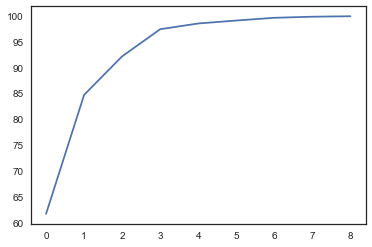

In [19]:
plt.plot(var1)

In [20]:
print(pd.DataFrame(pca.components_,columns=dff.columns,index = p_list))

          0         1         2         3         4         5         6   \
p1 -0.357129  0.002795  0.000375 -0.284318  0.015033 -0.429282  0.030081   
p2 -0.017629  0.012845 -0.001243 -0.092646  0.083516 -0.022745  0.050692   
p3 -0.009512 -0.055984 -0.002922  0.023456  0.603849 -0.039556 -0.088764   
p4 -0.056277 -0.082409  0.001390  0.381323 -0.047063 -0.183304 -0.303730   
p5  0.401657  0.181461  0.000072  0.241298  0.495408  0.252805  0.146343   
p6 -0.289528 -0.057796 -0.001457 -0.188228  0.614608 -0.175332 -0.021452   
p7  0.439649 -0.016073  0.000149 -0.135639 -0.005242  0.137741  0.097521   
p8 -0.227436 -0.244295  0.000209  0.548295  0.042458 -0.126307 -0.154485   
p9 -0.600797  0.348720  0.001154  0.124644 -0.007376  0.543742  0.362088   

          7         8         9         10        11        12        13  \
p1  0.000040 -0.346171  0.053163 -0.519529  0.075525 -0.000219 -0.439340   
p2 -0.001735 -0.079636  0.089767 -0.023257  0.098196 -0.001962 -0.050465   
p3 -0.00378

This values represent how the 15 attributes considered influence the weights
of the principal components vector